In [1]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
# import numpy as np
import csv
# import networkx as nx

In [2]:
import os
from matplotlib import font_manager as fm

font_file = "../폰트 파일/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

- 처음~2020.4월 : 거리두기 시작
- 2020.5월 : 생활방역 전환
- 2020.6월~8월 : 수도권 2단계
- 2020.9월 : 2.5단계 강화
- ~~2020.9월 : 거리두기 2단계로 하향~~
- 2020.10월 : 1단계 하향
- 2020.11월 : 정밀방역으로 세분화
- 2020.12월 : 2단계 시행
- ~~2020.12월 : 2.5단계 시행~~

+ 2021.1월~2월 : 2.5단계, 조치 완화
+ ~~2021.2월 : 2단계 완화~~
+ 2021.3월~6월 : 거리두기 개편
+ 2021.07월 거리두기 4단계

- 2022.8월~4월?? : 거리두기 해제?

In [3]:
with open("../참고 데이터/한국행정구역분류_행정동코드(서울).csv", encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류', '읍면동']]
newdata

,소분류,읍면동
0,1101053,사직동
1,1101054,삼청동
2,1101055,부암동
3,1101056,평창동
4,1101057,무악동
...,...,...
410,1125070,둔촌1동
411,1125071,둔촌2동
412,1125072,암사1동
413,1125073,천호2동


# 거리두기 시작

In [4]:
# 2020년 4월까지
from os import listdir
# import pandas as pd

filenames0 = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202002/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202002/")
]
filenames1 = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202003/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202003/")
]
filenames2 = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202004/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202004/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0] + [
    pd.read_csv(f, encoding='cp949') for f in filenames1
] + [pd.read_csv(f, encoding='cp949') for f in filenames2]
data = pd.concat(yo, ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
# data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
data2point5 = data.groupby(['도착 시군구 코드'
                            ])['이동인구(합)'].sum()  #.sort_values()  #.head(10)
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = [
    '금천구', '종로구', '양천구', '용산구', '도봉구', '성동구', '중구', '구로구', '서대문구', '중랑구',
    '강북구', '동대문구', '광진구', '동작구', '은평구', '서초구', '영등포구', '강동구', '성북구', '강서구',
    '노원구', '관악구', '마포구', '송파구', '강남구'
]

# 4개달 데이터 합치고 쓱싹쓱싹한게 6분 51.9초

# 처음 3개달 데이터 합치고 ㅆㅆㅆㅆ한게 5분 0.4초

# 다시 데이터 조정하고 ㅆㅆㅆㅆ한게 4분 50.6초

25607602
도착 시군구 코드
강남구     52441940.50
강동구     16682208.69
강북구     15545710.21
강서구     19961191.97
관악구     21638820.62
광진구     19287799.00
구로구     17021714.07
금천구      9767384.40
노원구     19853620.69
도봉구     13416013.33
동대문구    20054187.81
동작구     20902351.28
마포구     27798675.57
서대문구    22665044.98
서초구     37508676.26
성동구     21799731.57
성북구     22285083.73
송파구     29754531.54
양천구     17448229.99
영등포구    28966033.16
용산구     18880156.60
은평구     15214307.97
종로구     27531387.64
중구      29636292.01
중랑구     14966066.31
Name: 이동인구(합), dtype: float64


# 재정렬

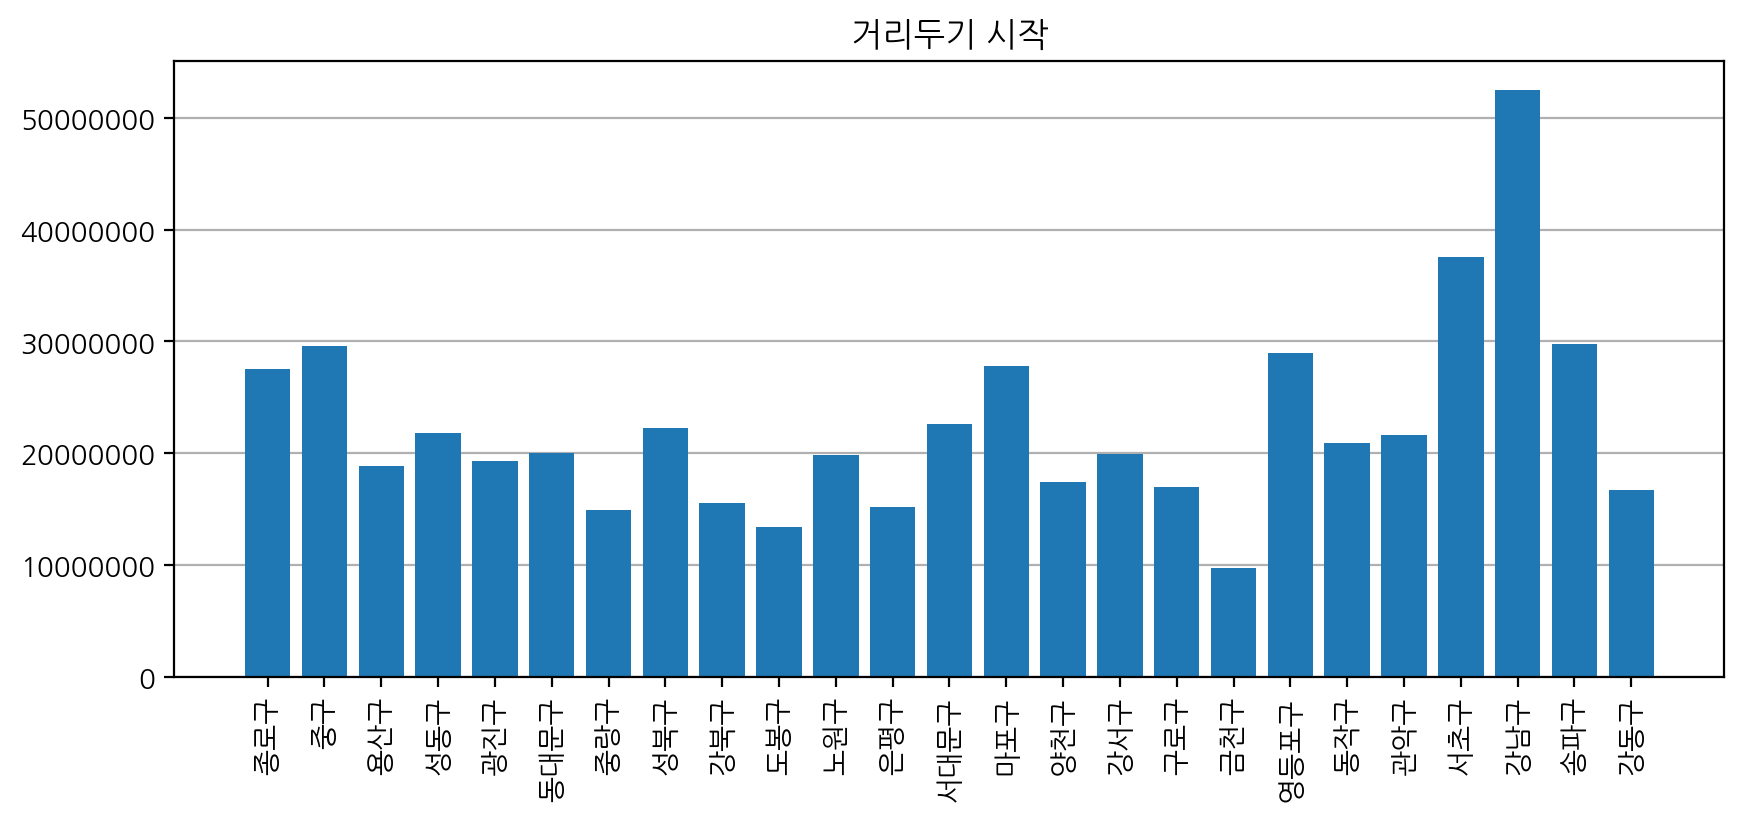

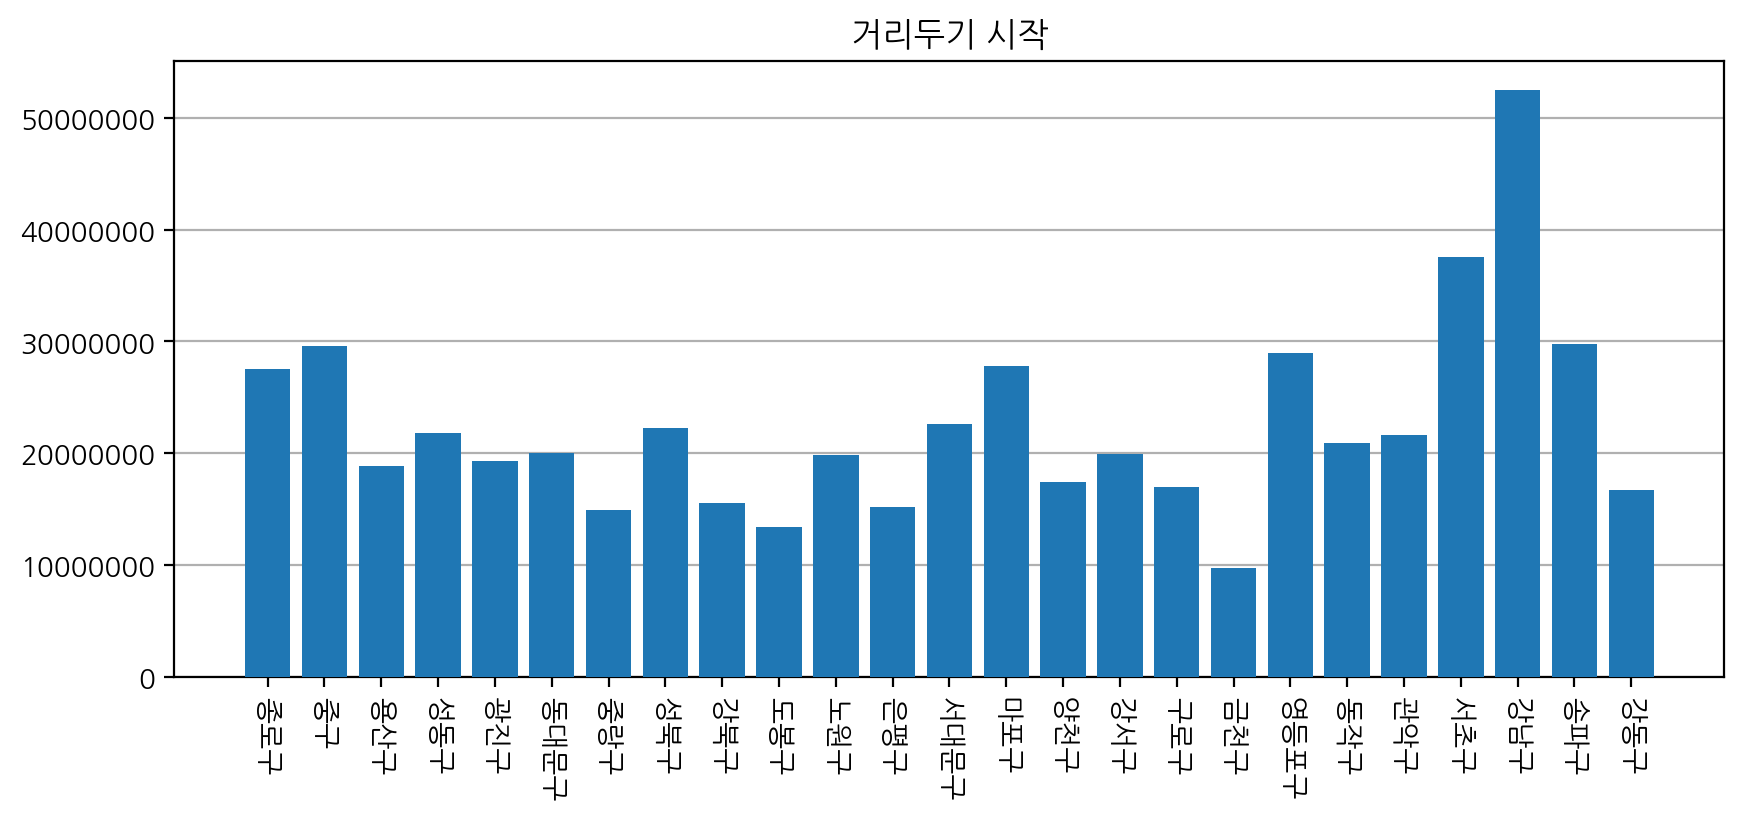

In [5]:
#data2point5.중랑구
d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
# ax.set_ylim(17000000,35000000)
ax.set_xticks(range(25), x, rotation=90)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 시작")
ax.set_axisbelow(True)
fig.show()

plt.figure(figsize=(10, 4))
# plt.ylim(17000000,35000000)
plt.grid(zorder=0, axis='y')
plt.bar(x, y, zorder=3)
plt.xticks(range(25), x, rotation=180 + 90)
plt.ticklabel_format(style='plain', axis='y')
# plt.legend()
plt.title("거리두기 시작")
# plt.savefig("../작업 결과물/소중한 그래프(2021년 1~4월 도착인구 뭉탱이).png", dpi=96)
plt.savefig("./메로나png/1. 거리두기 시작.png")
plt.show()


# 2020년6월~8월 : 수도권 2단계

In [6]:
# 2020년 6월에서 8월까지

from os import listdir
import pandas as pd

filenames0 = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202006/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202006/")
]
filenames1 = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202007/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202007/")
]
filenames2 = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202008/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202008/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0] \
    + [pd.read_csv(f, encoding='cp949') for f in filenames1] \
    + [pd.read_csv(f, encoding='cp949') for f in filenames2]
data = pd.concat(yo, ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
# data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum()#.sort_values()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()  #.sort_values()  #.head(10)
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = [
    '금천구', '종로구', '양천구', '용산구', '도봉구', '성동구', '중구', '구로구', '서대문구', '중랑구',
    '강북구', '동대문구', '광진구', '동작구', '은평구', '서초구', '영등포구', '강동구', '성북구', '강서구',
    '노원구', '관악구', '마포구', '송파구', '강남구'
]

# 5분 15.6초

28304580
도착 시군구 코드
강남구     61460694.02
강동구     19015443.85
강북구     17832368.40
강서구     23126384.31
관악구     24894526.74
광진구     22525266.98
구로구     20044685.00
금천구     11175196.49
노원구     23137600.09
도봉구     15714862.05
동대문구    23547704.32
동작구     24283211.74
마포구     32384639.24
서대문구    25835688.93
서초구     44132575.65
성동구     24817246.31
성북구     26139860.38
송파구     34455152.32
양천구     20083997.29
영등포구    34038634.18
용산구     22324397.51
은평구     17579375.32
종로구     33018301.17
중구      35081153.30
중랑구     17097427.42
Name: 이동인구(합), dtype: float64


# 재정렬

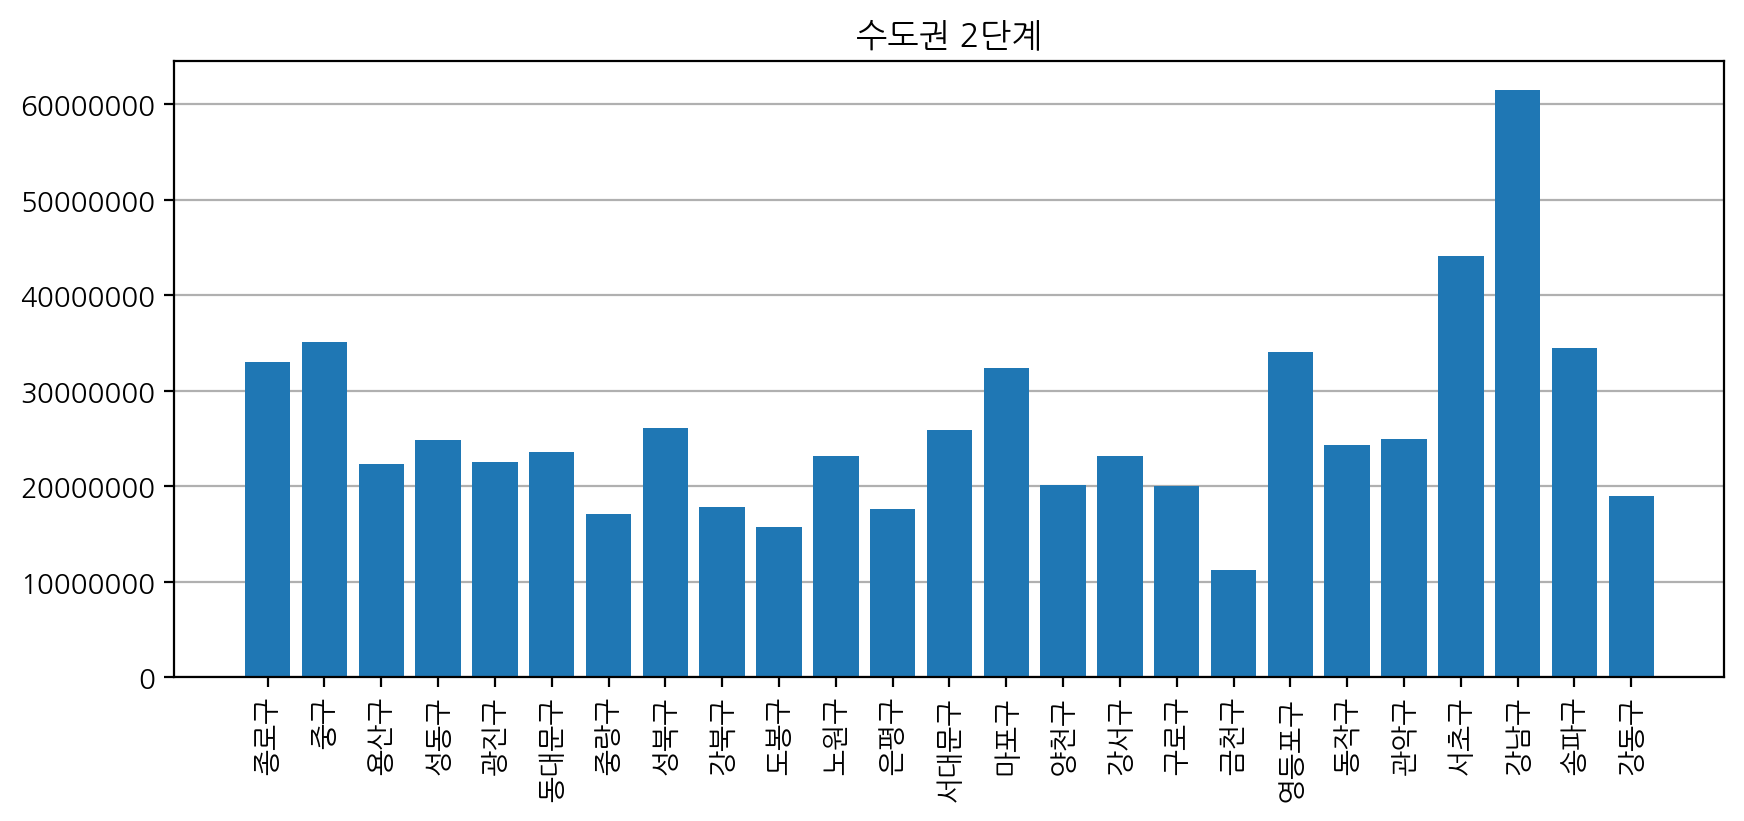

In [7]:
d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
# ax.set_ylim(16000000, 40000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_axisbelow(True)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("수도권 2단계")
# plt.savefig("../작업 결과물/소중한 그래프(2021년 1~4월 도착인구 뭉탱이).png", dpi=96)
fig.savefig("./메로나png/3. 수도권 2단계.png")
fig.show()

# 2021년 1월에서 2월까지 : 2.5단계, 조치완화

In [8]:
# 2021년 1월에서 2월까지
from os import listdir
import pandas as pd

filenames0 = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202101/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202101/")
]
filenames1 = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202102/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202102/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0] \
    + [pd.read_csv(f, encoding='cp949') for f in filenames1]
data = pd.concat(yo, ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
# data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum()#.sort_values()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()  #.sort_values()  #.head(10)
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = [
    '금천구', '종로구', '양천구', '용산구', '도봉구', '성동구', '중구', '구로구', '서대문구', '중랑구',
    '강북구', '동대문구', '광진구', '동작구', '은평구', '서초구', '영등포구', '강동구', '성북구', '강서구',
    '노원구', '관악구', '마포구', '송파구', '강남구'
]


16782422
도착 시군구 코드
강남구     33364915.08
강동구     10699175.86
강북구      9828683.46
강서구     12970729.63
관악구     13769494.81
광진구     12345653.59
구로구     11240813.37
금천구      6404749.52
노원구     12808246.38
도봉구      8672511.31
동대문구    13189894.26
동작구     13276493.71
마포구     17221868.67
서대문구    13981795.68
서초구     23798062.10
성동구     13982861.37
성북구     14437161.07
송파구     19228957.48
양천구     11169235.42
영등포구    19010373.83
용산구     12207374.97
은평구      9652093.12
종로구     17335257.56
중구      18763309.59
중랑구      9724299.48
Name: 이동인구(합), dtype: float64


# 재정렬

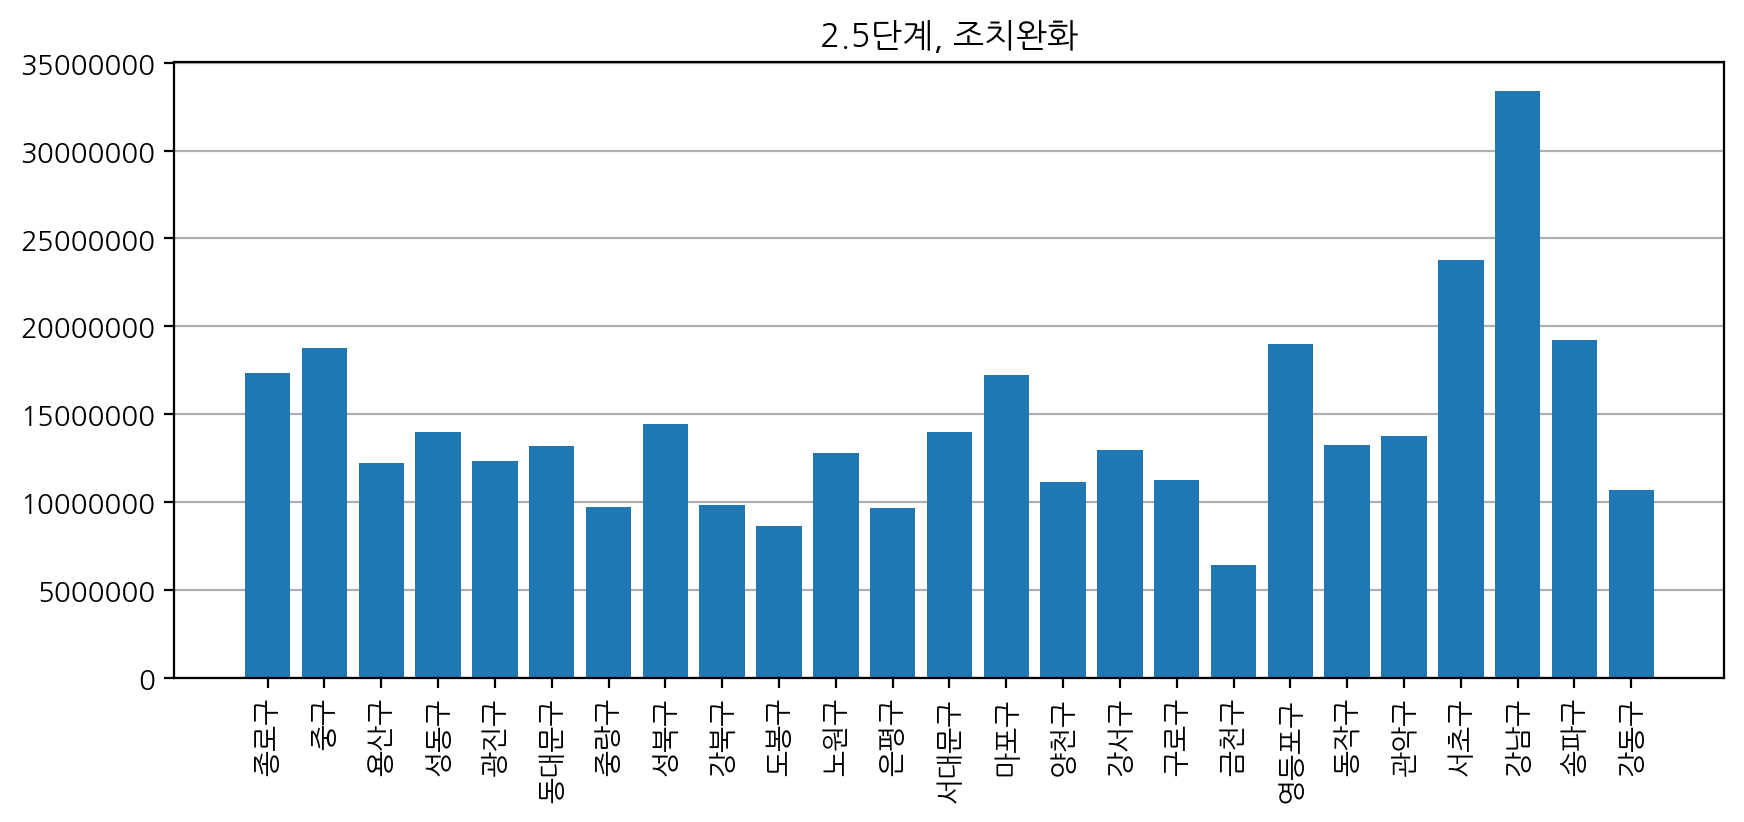

In [9]:
d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
# ax.set_ylim(11000000, 25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_axisbelow(True)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("2.5단계, 조치완화")
#fig.savefig("../작업 결과물/소중한 그래프(2021년 1월~2월 도착인구 뭉탱이).png", dpi=96)
fig.savefig("./메로나png/8. 2.5단계, 조치완화.png")
fig.show()

# 2021년 3월에서 4월까지 : 거리두기 개편 (1)

In [10]:
# 2021년 3월에서 6월까지
from os import listdir
import pandas as pd

filenames0 = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202103/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202103/")
]
filenames1 = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202104/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202104/")
]
# filenames2 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/")]
# filenames3 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/")]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0
      ] + [pd.read_csv(f, encoding='cp949') for f in filenames1]
data = pd.concat(yo, ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
# data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum()#.sort_values()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()  #.sort_values()  #.head(10)
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = [
    '금천구', '종로구', '양천구', '용산구', '도봉구', '성동구', '중구', '구로구', '서대문구', '중랑구',
    '강북구', '동대문구', '광진구', '동작구', '은평구', '서초구', '영등포구', '강동구', '성북구', '강서구',
    '노원구', '관악구', '마포구', '송파구', '강남구'
]


18362021
도착 시군구 코드
강남구     42009206.27
강동구     13375310.46
강북구     12309870.18
강서구     16215226.24
관악구     17248222.04
광진구     15525208.23
구로구     13935349.46
금천구      7896860.78
노원구     15863411.71
도봉구     10749770.00
동대문구    16416944.32
동작구     16783174.90
마포구     21972613.20
서대문구    17818874.76
서초구     30003778.61
성동구     17790924.44
성북구     18199317.27
송파구     23793500.91
양천구     13967555.82
영등포구    24449927.24
용산구     15722317.40
은평구     11890827.81
종로구     22878427.90
중구      24152972.93
중랑구     11900111.00
Name: 이동인구(합), dtype: float64


# 재정렬

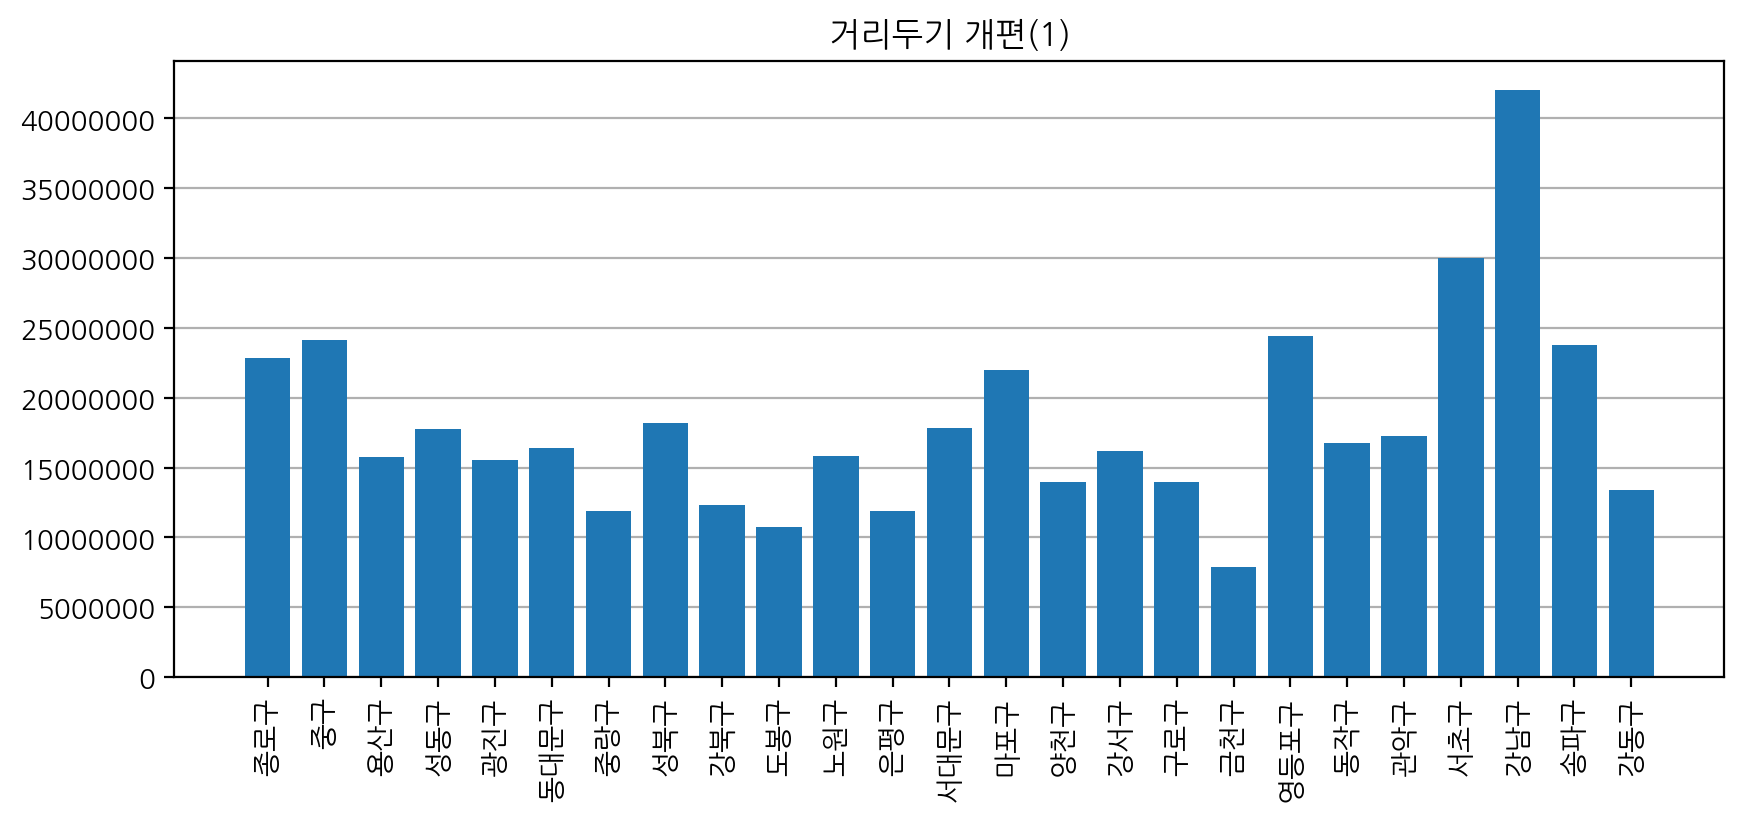

In [11]:
d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
# ax.set_ylim(11000000, 25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_axisbelow(True)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 개편(1)")
# fig.savefig("../작업 결과물/소중한 그래프(2021년 3월~6월 도착인구 뭉탱이).png", dpi=96)
fig.savefig("./메로나png/9. 거리두기 개편(1).png")
fig.show()

# 2021년 5월~6월 : 거리두기 개편 (2)

In [12]:
from os import listdir
import pandas as pd

filenames0 = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/")
]
filenames1 = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/")
]
# filenames2 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/")]
# filenames3 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/")]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0
      ] + [pd.read_csv(f, encoding='cp949') for f in filenames1]
data = pd.concat(yo, ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
# data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum()#.sort_values()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'
                            ])['이동인구(합)'].sum()  #.sort_values()  #.head(10)
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = [
    '금천구', '종로구', '양천구', '용산구', '도봉구', '성동구', '중구', '구로구', '서대문구', '중랑구',
    '강북구', '동대문구', '광진구', '동작구', '은평구', '서초구', '영등포구', '강동구', '성북구', '강서구',
    '노원구', '관악구', '마포구', '송파구', '강남구'
]


18771442
도착 시군구 코드
강남구     41818145.20
강동구     13402159.66
강북구     12445443.11
강서구     16431581.78
관악구     17376265.59
광진구     15854963.76
구로구     14080419.36
금천구      7923808.94
노원구     16036309.21
도봉구     10941370.88
동대문구    16560134.21
동작구     16908788.59
마포구     22582829.03
서대문구    18001742.81
서초구     29957634.85
성동구     17989303.75
성북구     18342054.19
송파구     23924967.68
양천구     14127823.47
영등포구    24545138.77
용산구     16195453.93
은평구     11982419.59
종로구     23029171.03
중구      24322722.20
중랑구     12103371.55
Name: 이동인구(합), dtype: float64


# 재정렬

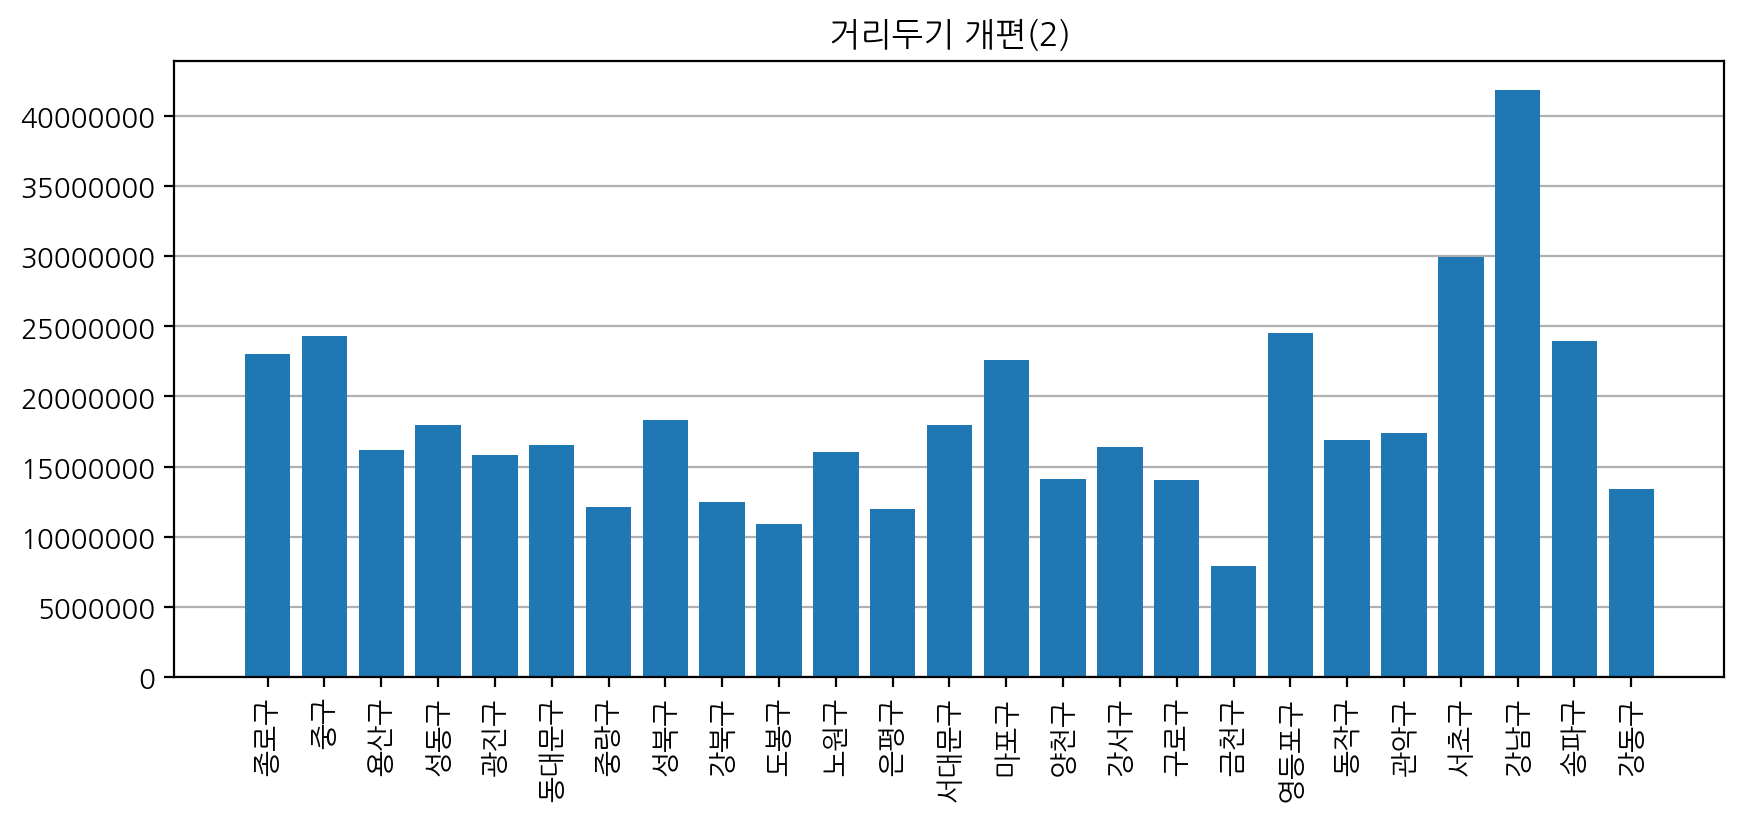

In [14]:
d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
# ax.set_ylim(11000000, 25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_axisbelow(True)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 개편(2)")
# fig.savefig("../작업 결과물/소중한 그래프(2021년 3월~6월 도착인구 뭉탱이).png", dpi=96)
fig.savefig("./메로나png/9. 거리두기 개편(2).png")
fig.show()